In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import matplotlib

from path import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text
from matplotlib import pyplot as plt
import seaborn as sns

import pydotplus
import io
from scipy import misc #access to img read method

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#cell magic

In [2]:
data = pd.read_csv('Resources/merged.csv', encoding='latin')

In [3]:
data.head()

,Popularity,artist_names,track_name,artist_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1,Drake,In My Feelings,['hip hop'],0.735,0.482,8,-9.445,1,0.1390,0.00623,0.01440,0.4480,0.315,181.995,217933
1,1,Drake,In My Feelings,['hip hop'],0.835,0.626,1,-5.833,1,0.1250,0.05890,0.00006,0.3960,0.350,91.030,217925
2,1,Shawn Mendes,Senorita,['pop'],0.759,0.540,9,-6.039,0,0.0287,0.03700,0.00000,0.0945,0.750,116.947,190960
3,1,Drake,Nonstop,['hip hop'],0.909,0.405,6,-8.133,0,0.1400,0.03060,0.00698,0.1050,0.455,154.984,238613
4,1,Shawn Mendes,Senorita,['pop'],0.759,0.548,9,-6.049,0,0.0290,0.03920,0.00000,0.0828,0.749,116.967,190800


In [4]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,102.708693,0.695772,0.640146,5.329061,-6.074268,0.577721,0.114078,0.238406,0.007309,0.170844,0.509682,120.845921,204597.398509
std,56.768983,0.138846,0.158111,3.668087,2.322777,0.493980,0.102970,0.238018,0.048404,0.131597,0.224947,29.191136,44103.762713
min,1.000000,0.238000,0.111000,0.000000,-18.435000,0.000000,0.023200,0.000025,0.000000,0.021500,0.037000,62.948000,30583.000000
25%,54.000000,0.609000,0.537000,2.000000,-7.226000,0.000000,0.044800,0.047600,0.000000,0.093600,0.338000,96.145500,175933.000000
50%,103.000000,0.714000,0.658000,6.000000,-5.696000,1.000000,0.070700,0.160000,0.000000,0.118000,0.508000,118.961000,200785.000000
75%,152.000000,0.797000,0.762000,8.000000,-4.521000,1.000000,0.145000,0.349000,0.000029,0.194000,0.680000,140.023000,226987.000000
max,200.000000,0.970000,0.972000,11.000000,-0.515000,1.000000,0.856000,0.991000,0.657000,0.920000,0.972000,203.927000,588139.000000


In [5]:
print(data.keys())

Index(['Popularity', 'artist_names', 'track_name', 'artist_genres',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [6]:
#clearing nuns
pd.isnull(data).sum()

Popularity          0
artist_names        0
track_name          0
artist_genres       0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

Text(0.5, 1.0, 'Popularity Distribution')

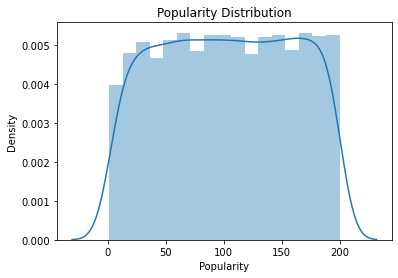

In [7]:
sns.distplot(data['Popularity']).set_title('Popularity Distribution')

In [8]:
data.corr()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Popularity,1.000000,-0.086276,-0.027783,0.007366,-0.033903,0.013043,0.027805,0.004314,-0.001506,-0.008425,-0.048123,0.020086,0.052855
danceability,-0.086276,1.000000,0.093722,0.090748,0.176717,-0.118495,0.184960,-0.224515,-0.058706,-0.069002,0.409413,-0.095547,-0.154230
energy,-0.027783,0.093722,1.000000,0.041759,0.706547,-0.051149,-0.045943,-0.542052,-0.052432,0.090936,0.416433,0.083706,0.007753
key,0.007366,0.090748,0.041759,1.000000,0.018092,-0.128741,0.034259,-0.012451,0.019772,-0.017671,0.101390,-0.055000,-0.031227
loudness,-0.033903,0.176717,0.706547,0.018092,1.000000,-0.018340,-0.110198,-0.390421,-0.209229,0.012732,0.388370,0.047879,-0.031050
mode,0.013043,-0.118495,-0.051149,-0.128741,-0.018340,1.000000,-0.066492,0.036913,0.002436,-0.028025,-0.039835,0.026260,0.032349
speechiness,0.027805,0.184960,-0.045943,0.034259,-0.110198,-0.066492,1.000000,-0.045309,-0.007028,-0.022835,-0.003244,0.185111,-0.114408
acousticness,0.004314,-0.224515,-0.542052,-0.012451,-0.390421,0.036913,-0.045309,1.000000,-0.008011,-0.085148,-0.149192,-0.060281,0.008967
instrumentalness,-0.001506,-0.058706,-0.052432,0.019772,-0.209229,0.002436,-0.007028,-0.008011,1.000000,-0.032426,-0.068236,0.032449,0.063583
liveness,-0.008425,-0.069002,0.090936,-0.017671,0.012732,-0.028025,-0.022835,-0.085148,-0.032426,1.000000,0.037553,-0.011204,-0.022903


Text(0.5, 1.0, 'Popularity Based on Danceability')

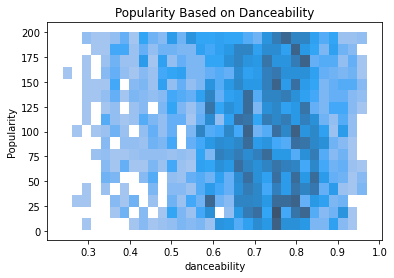

In [9]:
sns.histplot(x = 'danceability', y = 'Popularity', data = data)
plt.title('Popularity Based on Danceability')

Text(0.5, 1.0, 'Popularity Based on Key')

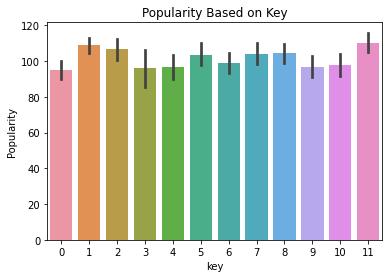

In [10]:
sns.barplot(x = 'key', y = 'Popularity', data = data)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Valence')

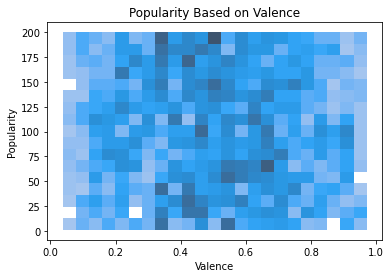

In [11]:
sns.histplot(x = 'valence', y = 'Popularity', data = data)
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.title('Popularity Based on Valence')

<AxesSubplot:xlabel='loudness', ylabel='Popularity'>

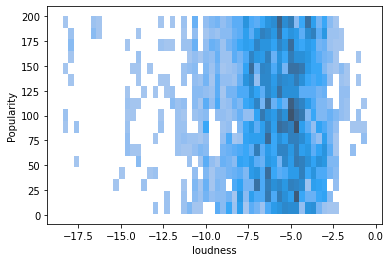

In [12]:
sns.histplot(x = 'loudness', y = 'Popularity', data = data)

<AxesSubplot:xlabel='acousticness', ylabel='Popularity'>

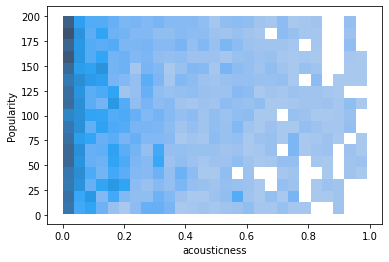

In [13]:
sns.histplot(x = 'acousticness', y = 'Popularity', data = data)

Text(0.5, 1.0, 'Acoustiness for Songs out of Top 20')

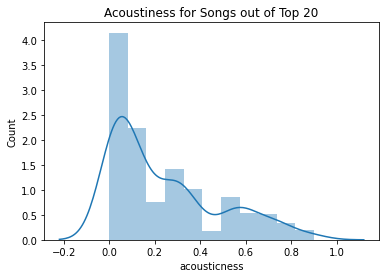

In [14]:
songs_out_20 = data[data.Popularity<21]
sns.distplot(songs_out_20['acousticness'])
plt.ylabel('Count')
plt.title('Acoustiness for Songs out of Top 20')

Text(0.5, 1.0, 'Acoustiness for Songs in Top 20')

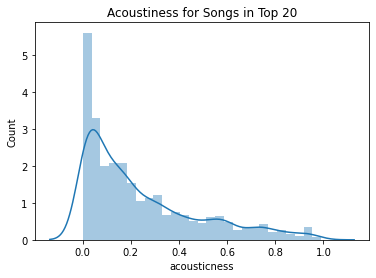

In [15]:
songs_in_20 = data[data.Popularity>21]
sns.distplot(songs_in_20['acousticness'])
plt.ylabel('Count')
plt.title('Acoustiness for Songs in Top 20')

Text(0.5, 1.0, 'Danceability for Songs out of Top 20')

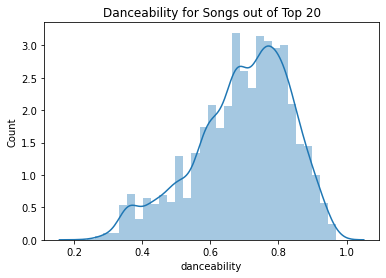

In [16]:
songs_out_20 = data[data.Popularity>21]
sns.distplot(songs_out_20['danceability'])
plt.ylabel('Count')
plt.title('Danceability for Songs out of Top 20')

Text(0.5, 1.0, 'Danceability for Songs in Top 20')

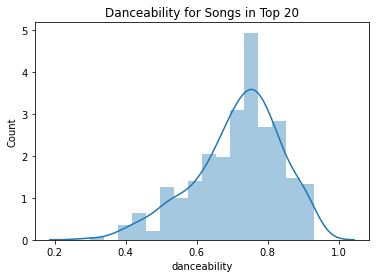

In [17]:
songs_in_20 = data[data.Popularity<21]
sns.distplot(songs_in_20['danceability'])
plt.ylabel('Count')
plt.title('Danceability for Songs in Top 20')

Text(0.5, 1.0, 'Loudness for Songs out of Top 20')

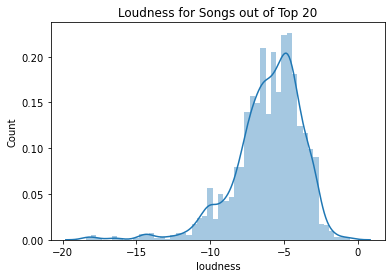

In [18]:
songs_out_20 = data[data.Popularity>21]
sns.distplot(songs_out_20['loudness'])
plt.ylabel('Count')
plt.title('Loudness for Songs out of Top 20')

Text(0.5, 1.0, 'Loudness for Songs in Top 20')

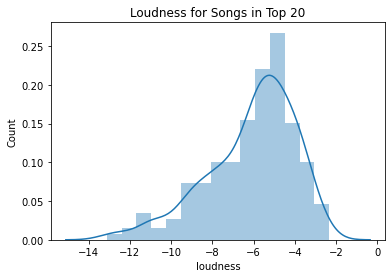

In [19]:
songs_in_20 = data[data.Popularity<21]
sns.distplot(songs_in_20['loudness'])
plt.ylabel('Count')
plt.title('Loudness for Songs in Top 20')

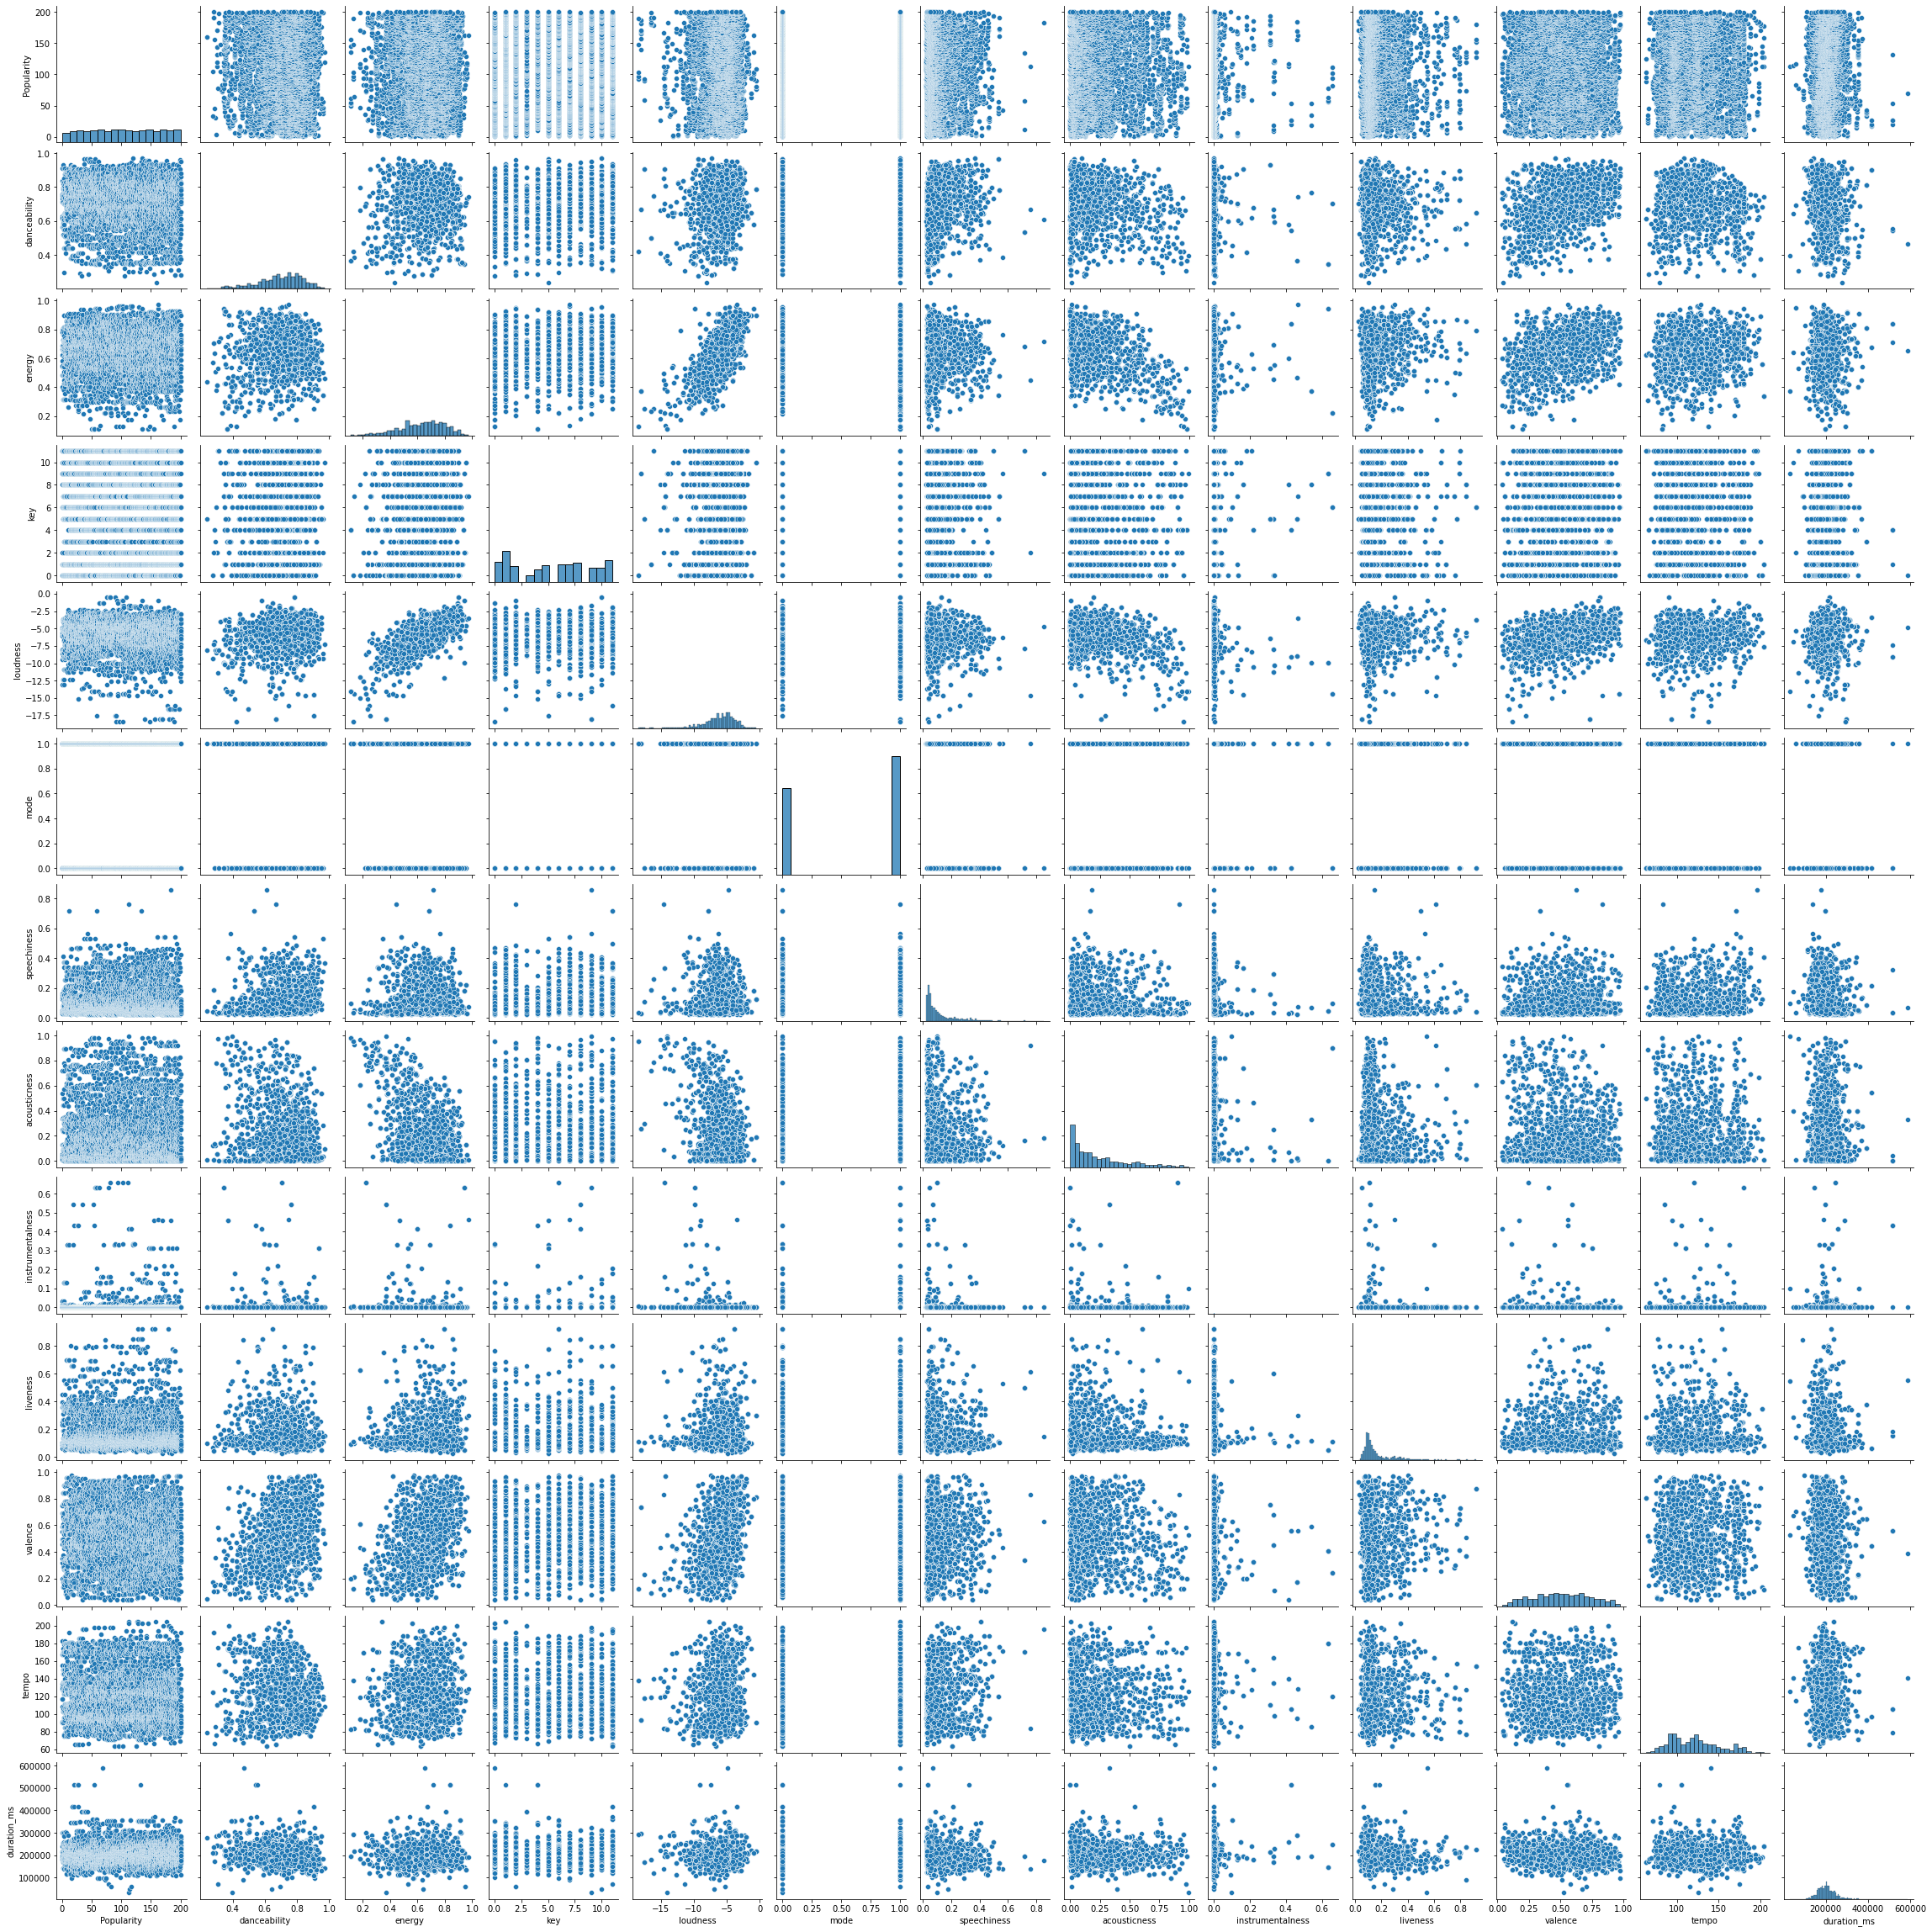

In [20]:
sns.pairplot(data)
plt.savefig('Resources/multi_plots')

### Training and Fitting

In [21]:
data.loc[data['Popularity'] < 21, 'Popularity'] = 0 
data.loc[data['Popularity'] >= 21, 'Popularity'] = 1
data.loc[data['Popularity'] == 1]

,Popularity,artist_names,track_name,artist_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
359,1,XXXTENTACION,Moonlight,['rap'],0.921,0.537,9,-5.723,0,0.0804,0.5560,0.004040,0.1020,0.711,128.009,135090
360,1,Drake,Im Upset,['hip hop'],0.899,0.587,11,-7.866,0,0.3380,0.2790,0.000000,0.0835,0.490,149.993,214467
361,1,Selena Gomez,Back To You From 13 Reasons Why Season 2 Sound...,['pop'],0.601,0.724,6,-4.856,1,0.0486,0.0945,0.000002,0.1200,0.508,102.061,207905
362,1,Martin Garrix,Ocean feat Khalid,['pop'],0.506,0.693,0,-7.265,0,0.0412,0.5840,0.000096,0.0891,0.221,139.912,216420
363,1,Dynoro,In My Mind,['pop'],0.694,0.770,6,-5.335,1,0.1490,0.1760,0.000011,0.1180,0.163,125.905,184560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,1,Eminem,The Real Slim Shady,['hip hop'],0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200
4287,1,Tones And I,Dance Monkey,['pop'],0.824,0.587,6,-6.401,0,0.0937,0.6900,0.000105,0.1490,0.514,98.029,209438
4288,1,Avicii,The Nights,['pop'],0.527,0.835,6,-5.298,1,0.0433,0.0166,0.000000,0.2490,0.654,125.983,176658
4289,1,The Weeknd,Stargirl Interlude,['pop'],0.715,0.470,5,-12.638,0,0.0772,0.3530,0.092300,0.1040,0.426,89.965,111627


In [22]:
#features we want DT to consider as it is begining to be built & store it as a list
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "valence"]

In [23]:
#75% of the dataframe for training and 25% of the dataframe for testing
training = data.sample(frac = 0.75,random_state = 78)
X_train = training[features]
y_train = training['Popularity']
X_test = data.drop(training.index)[features]

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 78)

In [25]:
c = DecisionTreeClassifier(min_samples_split=100)
dt = c.fit(X_train,y_train)
dt_prediction = c.predict(X_valid)
dt_accuracy = accuracy_score(y_valid, dt_prediction)
print("Accuracy: " + str(dt_accuracy))

Accuracy: 0.8993788819875776


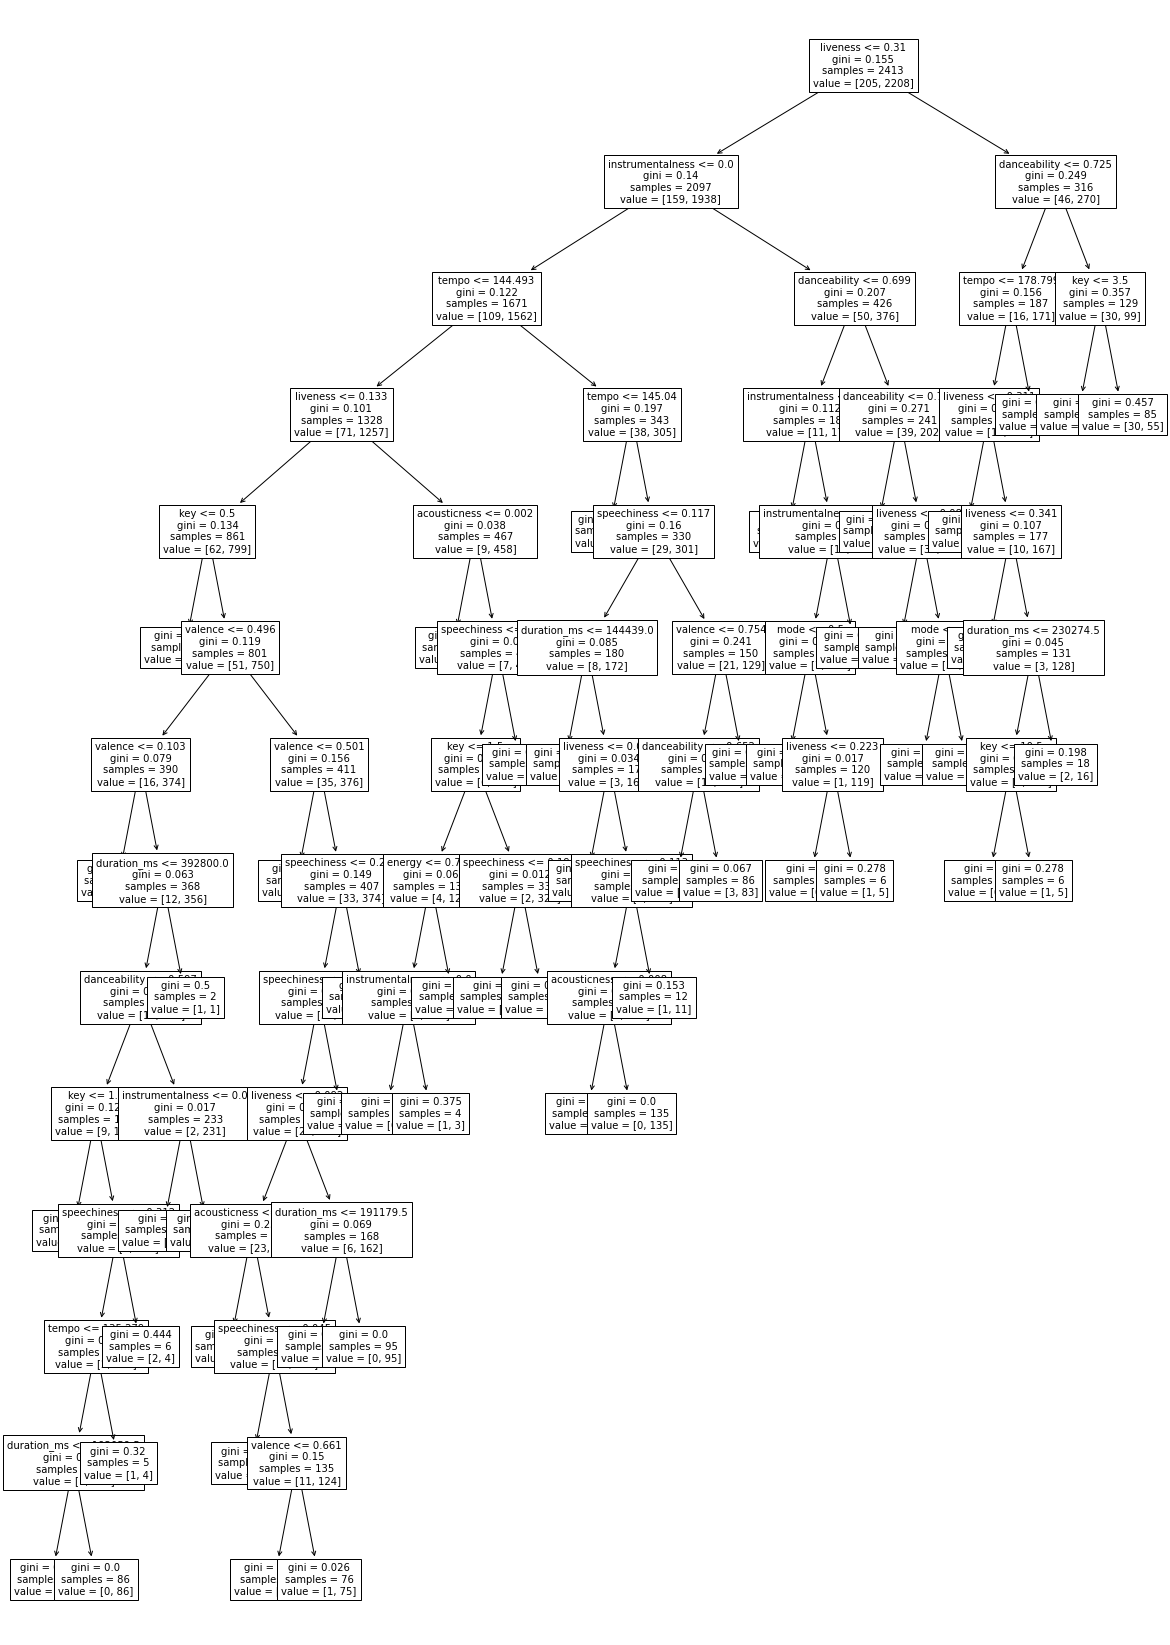

In [26]:
#decision tree image
plt.figure(figsize=(20,30))
tree.plot_tree(dt, feature_names = features, fontsize = 10)
plt.savefig('Resources/tree_high_dpi', dpi=100)

## RandomForest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
random_model = RandomForestClassifier()
random_model.fit(X_train, y_train)
random_predict = random_model.predict(X_valid)
random_accuracy = accuracy_score(y_valid, random_predict)
print("Accuracy: " + str(random_accuracy))

Accuracy: 0.9329192546583851


## Logistic Regression Classifier

In [32]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_Predict = logistic_reg.predict(X_valid)
logistic_reg_Accuracy = accuracy_score(y_valid, logistic_reg_Predict)
print("Accuracy: " + str(logistic_reg_Accuracy))

Accuracy: 0.915527950310559


## Performance of Classifiers

In [33]:
performance_accuracy = pd.DataFrame({'Classifiers': ['LogisticRegression', 'RandomForestClassifier','DecisionTreeClassifier',],
                                            'Accuracy': [logistic_reg_Accuracy,random_accuracy,dt_accuracy]})

In [34]:
performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Classifiers,Accuracy
1,RandomForestClassifier,0.932919
0,LogisticRegression,0.915528
2,DecisionTreeClassifier,0.899379


In [45]:
performance_accuracy.to_csv("Resources/calssifiers.csv")